# GAN Training

## imports

In [1]:
import os
import matplotlib.pyplot as plt

from models.GAN import GAN
from utils.loaders import load_safari


/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [3]:
(x_train, y_train) = load_safari('camel')

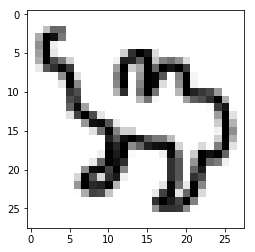

In [4]:
plt.imshow(x_train[200,:,:,0], cmap = 'gray_r')

## architecture

In [5]:
if mode == 'build':

    gan = GAN(input_dim = (28,28,1)
            , discriminator_conv_filters = [64,64,128,128]
            , discriminator_conv_kernel_size = [5,5,5,5]
            , discriminator_conv_strides = [2,2,2,1]
            , discriminator_batch_norm_momentum = None
            , discriminator_activation = 'relu'
            , discriminator_dropout_rate = 0.4
            , discriminator_learning_rate = 0.0008
            , generator_initial_dense_layer_size = (7, 7, 64)
            , generator_upsample = [2,2, 1, 1]
            , generator_conv_filters = [128,64, 64,1]
            , generator_conv_kernel_size = [5,5,5,5]
            , generator_conv_strides = [1,1, 1, 1]
            , generator_batch_norm_momentum = 0.9
            , generator_activation = 'relu'
            , generator_dropout_rate = None
            , generator_learning_rate = 0.0004
            , optimiser = 'rmsprop'
            , z_dim = 100
            )

    gan.save(RUN_FOLDER)

else:
    GAN.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [6]:
gan.discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
discriminator_input (InputLa (None, 28, 28, 1)         0         
_________________________________________________________________
discriminator_conv_0 (Conv2D (None, 14, 14, 64)        1664      
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
discriminator_conv_1 (Conv2D (None, 7, 7, 64)          102464    
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [7]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3136)              316736    
_________________________________________________________________
batch_normalization_1 (Batch (None, 3136)              12544     
_________________________________________________________________
activation_5 (Activation)    (None, 3136)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 64)        0         
_________________________________________________________________
generator_conv_0 (Conv2D)    (None, 14, 14, 128)       204928    
__________

## training

In [8]:
BATCH_SIZE = 64
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5

In [10]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

2 [D loss: (0.390)(R 0.068, F 0.711)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.004] [G acc: 1.000]
3 [D loss: (0.711)(R 0.000, F 1.423)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.482] [G acc: 0.891]
4 [D loss: (0.474)(R 0.255, F 0.692)] [D acc: (0.875)(1.000, 0.750)] [G loss: 0.044] [G acc: 1.000]
5 [D loss: (4.406)(R 0.005, F 8.807)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.545] [G acc: 1.000]
6 [D loss: (0.799)(R 0.568, F 1.029)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.558] [G acc: 1.000]
7 [D loss: (0.764)(R 0.596, F 0.932)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.600] [G acc: 1.000]
8 [D loss: (0.741)(R 0.621, F 0.860)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.629] [G acc: 0.969]
9 [D loss: (0.722)(R 0.642, F 0.802)] [D acc: (0.500)(1.000, 0.000)] [G loss: 0.663] [G acc: 0.891]
10 [D loss: (0.713)(R 0.660, F 0.767)] [D acc: (0.500)(0.984, 0.016)] [G loss: 0.686] [G acc: 0.562]
11 [D loss: (0.707)(R 0.667, F 0.747)] [D acc: (0.461)(0.922, 0.000)] [G loss: 0.703] [G acc: 0.266

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 2)

plt.show()


In [ ]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()